# <font color='CC3D3D'>데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import klib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font',family='Malgun Gothic')
pd.set_option('display.max_columns', None)

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

# 파일불러오기

In [2]:
train = pd.read_csv('L.POINT_train.csv', encoding='UTF-8')
test = pd.read_csv('L.POINT_test.csv', encoding='UTF-8')
y_train =  pd.read_csv('y_train.csv')

In [3]:
train['PD_BUY_AM']  = train['PD_BUY_AM'].map(lambda x: int(str(x).replace(',','')) )
train['PD_BUY_CT']  = train['PD_BUY_CT'].map(lambda x: int(str(x).replace(',','')) )
test['PD_BUY_AM']  = test['PD_BUY_AM'].map(lambda x: int(str(x).replace(',','')) )
test['PD_BUY_CT']  = test['PD_BUY_CT'].map(lambda x: int(str(x).replace(',','')) )

# <font color='CC3D3D'>Feature Making

In [4]:
data=pd.DataFrame()
data_te=pd.DataFrame()

In [5]:
train

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,KWD_NM,SEARCH_CNT,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,0,6771240,63,578845,1개,필립스(PHILIPS),81000,1,17,20180609,59.0,922,mobile,Gyeonggi-do,Bucheon-si,에어컨 커버,1,아방세 프로믹스 핸드블렌더 HR1672/90,생활/주방가전,주방가전,블랜더
1,0,6771240,63,788068,선택:버닝 [베이지] / 1개,쁘리엘르,5500,1,17,20180609,59.0,922,mobile,Gyeonggi-do,Bucheon-si,에어컨 커버,1,스판 벽걸이 에어컨커버(트라이앵글_82x27x26) 모음 - 블루가든 [블루],침구/수예,수예소품,거실수예소품
2,1,5762174,109,180447,사이즈:L(105) / 1개,퀵실버,59000,1,12,20180626,161.0,"1,661",mobile,Seoul,Seoul,바비브라운,1,퀵실버 남성 루즈핏 래쉬가드 QS579KMT - M(100),시즌스포츠,수영/물놀이,남성수영복
3,1,5753875,94,731145,1개,키엘,39000,1,13,20180626,115.0,620,mobile,Seoul,Seoul,키엘,2,칼렌듈라 딥 클렌징 포밍 페이스 워시 230ml,화장품/뷰티케어,스킨케어,페이셜클렌저
4,1,7417570,114,216947,1개,키엘,49000,1,2,20180529,122.0,860,mobile,Seoul,Seoul,키엘비타민,2,키엘 자외선 차단제 점보 세트,화장품/뷰티케어,선케어,선크림류
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948681,263103,4792233,76,144818,색상:핑크(P)|사이즈:105 / 1개,엠엘비키즈,79000,1,182,20180712,271.0,"2,627",mobile,Seoul,Seoul,키즈샌들,1,돌핀 배색 올인원 수영복[71SW77831] - 핑크(P) / 110,시즌스포츠,수영/물놀이,아동수영복
1948682,263103,4792233,76,144818,색상:핑크(P)|사이즈:105 / 1개,엠엘비키즈,79000,1,182,20180712,271.0,"2,627",mobile,Seoul,Seoul,갭키즈,1,돌핀 배색 올인원 수영복[71SW77831] - 핑크(P) / 110,시즌스포츠,수영/물놀이,아동수영복
1948683,263103,4792233,76,144818,색상:핑크(P)|사이즈:105 / 1개,엠엘비키즈,79000,1,182,20180712,271.0,"2,627",mobile,Seoul,Seoul,팁토이조이,1,돌핀 배색 올인원 수영복[71SW77831] - 핑크(P) / 110,시즌스포츠,수영/물놀이,아동수영복
1948684,263103,4792233,76,144818,색상:핑크(P)|사이즈:105 / 1개,엠엘비키즈,79000,1,182,20180712,271.0,"2,627",mobile,Seoul,Seoul,갭키즈 수영복,1,돌핀 배색 올인원 수영복[71SW77831] - 핑크(P) / 110,시즌스포츠,수영/물놀이,아동수영복


**[총구매액, 구매건수, 평균구매액, 최대구매액]**

In [6]:
train['AMOUNT'] = train['PD_BUY_AM'] * train['PD_BUY_CT']
test['AMOUNT'] = test['PD_BUY_AM'] * test['PD_BUY_CT']

In [7]:
f = train.groupby('CLNT_ID')['AMOUNT'].agg([('총구매액', np.sum),
                                            ('평균구매액', lambda x : np.round(np.mean(x))),
                                            ('최대구매액', np.max)])
data=pd.concat([data,f],axis=1)

f_te = test.groupby('CLNT_ID')['AMOUNT'].agg([('총구매액', np.sum),
                                            ('평균구매액', lambda x : np.round(np.mean(x))),
                                            ('최대구매액', np.max)])
data_te = pd.concat([data_te,f_te],axis=1);data_te

,총구매액,평균구매액,최대구매액
CLNT_ID,,,
2,560000,50909,62100
3,851200,106400,110400
4,125200,20867,37000
5,380000,31667,42000
7,457900,28619,40000
...,...,...,...
263097,753220,57940,105000
263098,601200,100200,100200
263099,973000,8688,22000


**[최소구매액]**

In [8]:
f = train.groupby('CLNT_ID')['AMOUNT'].agg([('최소구매액', np.min)]) #최소구매액
data=pd.concat([data,f],axis=1)

f_te = test.groupby('CLNT_ID')['AMOUNT'].agg([('최소구매액', np.min)]) #최소구매액
data_te = pd.concat([data_te,f_te],axis=1);data_te

,총구매액,평균구매액,최대구매액,최소구매액
CLNT_ID,,,,
2,560000,50909,62100,20000
3,851200,106400,110400,102400
4,125200,20867,37000,12800
5,380000,31667,42000,11000
7,457900,28619,40000,20600
...,...,...,...,...
263097,753220,57940,105000,25900
263098,601200,100200,100200,100200
263099,973000,8688,22000,7000


**[주말방문비율]**

In [9]:
train['date'] = pd.to_datetime(train['SESS_DT'], format= '%Y%m%d')
test['date'] = pd.to_datetime(test['SESS_DT'], format= '%Y%m%d')

In [10]:
f = train.groupby('CLNT_ID')['date'].agg([('주말방문비율', lambda x: np.mean(x.dt.dayofweek>4))])
data=pd.concat([data,f],axis=1)

f_te = test.groupby('CLNT_ID')['date'].agg([('주말방문비율', lambda x: np.mean(x.dt.dayofweek>4))])
data_te=pd.concat([data_te,f_te],axis=1); data_te

,총구매액,평균구매액,최대구매액,최소구매액,주말방문비율
CLNT_ID,,,,,
2,560000,50909,62100,20000,0.000000
3,851200,106400,110400,102400,1.000000
4,125200,20867,37000,12800,0.333333
5,380000,31667,42000,11000,0.000000
7,457900,28619,40000,20600,0.312500
...,...,...,...,...,...
263097,753220,57940,105000,25900,0.307692
263098,601200,100200,100200,100200,0.000000
263099,973000,8688,22000,7000,0.000000


고가상품구매율

In [11]:
# 상품중분류별 평균 판매단가에 대한 4분위수 계산 => 3Q 이상을 고가상품으로 설정

#train
price_4q = train.groupby('CLAC2_NM')['PD_BUY_AM'].mean().quantile([.25,.5,.75])
f = (train.groupby('CLNT_ID')['PD_BUY_AM'].agg([('고가상품구매율', lambda x: (x > price_4q.iloc[2]).mean().round(2))]))
data=pd.concat([data,f],axis=1)


#test
price_4q = test.groupby('CLAC2_NM')['PD_BUY_AM'].mean().quantile([.25,.5,.75])
f_te = (test.groupby('CLNT_ID')['PD_BUY_AM'].agg([('고가상품구매율', lambda x: (x > price_4q.iloc[2]).mean().round(2))]))
data_te=pd.concat([data_te,f_te],axis=1)


### 내점일수

In [12]:
# train
f = train.groupby("CLNT_ID")['date'].agg([('내점일수',lambda x: x.nunique()),('구매주기', lambda x : int(((x.max() - x.min()).days) / x.nunique()))])
data=pd.concat([data,f],axis=1)


# test
f_te = test.groupby("CLNT_ID")['date'].agg([('내점일수',lambda x: x.nunique()),('구매주기', lambda x : int(((x.max() - x.min()).days) / x.nunique()))])
data_te=pd.concat([data_te,f_te],axis=1)

구매빈도

In [13]:
# 최종 구매일 다음날을 기준으로 계산 
# 최종 구매일 + 1일 더하기

#train
now = train.date.max()+pd.DateOffset(days=1) #1은 하루전 구매 38은 38일전구매 (누가 가장 최근에 구매하는가)
f = train.groupby('CLNT_ID')['date'].agg(lambda x,y: (y - x).min().days, now)
data=pd.concat([data,f],axis=1)
data = data.rename(columns = {"date" : "recency"})
# test
now_te = test.date.max()+pd.DateOffset(days=1)
f_te = test.groupby('CLNT_ID')['date'].agg(lambda x,y: (y - x).min().days, now_te)
data_te=pd.concat([data_te,f_te],axis=1)
data_te = data_te.rename(columns = {"date" : "recency"})


세션 접속 일수

In [14]:
#train
f = pd.DataFrame(train.groupby("CLNT_ID")["date"].nunique())
f = f.rename(columns = {"date" : "세션 접속 일수"})
data = pd.concat([data,f],axis=1)
#test
f_te = pd.DataFrame(test.groupby("CLNT_ID")["date"].nunique())
f_te = f_te.rename(columns = {"date" : "세션 접속 일수"})
data_te = pd.concat([data_te,f_te],axis=1)




총 페이지 조회 건수

In [15]:
#train
df = train[['CLNT_ID','TOT_PAG_VIEW_CT']]

f = df.groupby(['CLNT_ID'])['TOT_PAG_VIEW_CT'].agg([('총페이지조회건수','sum')])
data = pd.concat([data,f],axis=1)

#test
df_te = test[['CLNT_ID','TOT_PAG_VIEW_CT']]

f_te = df_te.groupby(['CLNT_ID'])['TOT_PAG_VIEW_CT'].agg([('총페이지조회건수','sum')])
data_te = pd.concat([data_te,f_te],axis=1)


상위 키워드 검색의 합

In [16]:
# 검색키워드명 KWD_NM (많이 나온 단어 검색 비율)
#train
df = train[['CLNT_ID','KWD_NM']]

len(train['KWD_NM'])
# 단어 언급 횟수
KWD = dict()
for i in train['KWD_NM'] :
    KWD[i] = KWD.get(i,0) +1
    
# 자주 언급되는 단어 Top20
a = sorted([(v,k) for k,v in KWD.items()], reverse=True)[:20]
#TOP20 이름
b=[]
for i in range(20):
    b.append(a[i][1])
    
# Top20 안에든 단어 검색하면 1, 아니면 0
def f_word(x):
    if x in b:
        return 1
    else:
        return 0

df['상위키워드검색여부']=df['KWD_NM'].apply(f_word)
#display(df)
f = df.groupby(['CLNT_ID'])['상위키워드검색여부'].agg([('상위키워드검색합','sum')])
data = pd.concat([data,f],axis=1)


# 검색키워드명 KWD_NM (많이 나온 단어 검색 비율)
#test
df_te = test[['CLNT_ID','KWD_NM']]

len(test['KWD_NM'])
# 단어 언급 횟수
KWD_te = dict()
for i in test['KWD_NM'] :
    KWD_te[i] = KWD_te.get(i,0) +1
    
# 자주 언급되는 단어 Top20
a_te = sorted([(v,k) for k,v in KWD_te.items()], reverse=True)[:20]
#TOP20 이름
b_te=[]
for i in range(20):
    b_te.append(a_te[i][1])
    
# Top20 안에든 단어 검색하면 1, 아니면 0
def f_te_word(x):
    if x in b:
        return 1
    else:
        return 0

df_te['상위키워드검색여부']=df_te['KWD_NM'].apply(f_te_word)
#display(df)
f_te = df_te.groupby(['CLNT_ID'])['상위키워드검색여부'].agg([('상위키워드검색합','sum')])
data_te = pd.concat([data_te,f_te],axis=1)


총접속시간 대비 최소,최대,평균 접속시간

In [17]:
train['TOT_SESS_HR_V']  = train['TOT_SESS_HR_V'].map(lambda x: int(str(x).replace(',','')))
test['TOT_SESS_HR_V']  = test['TOT_SESS_HR_V'].map(lambda x: int(str(x).replace(',',''))) 

In [18]:
#train
f = train.groupby('CLNT_ID')['TOT_SESS_HR_V'].agg([('총접속시간', np.sum),
                                                   ('평균접속시간', lambda x : np.round(np.mean(x))),
                                                   ('최대접속시간', np.max),
                                                   ('최소접속시간', np.min)])

f['총접속시간 대비 평균접속시간'] = f['평균접속시간']/f['총접속시간']
f['총접속시간 대비 최대접속시간'] = f['최대접속시간']/f['총접속시간']
f['총접속시간 대비 최소접속시간'] = f['최소접속시간']/f['총접속시간']

data=pd.concat([data,f],axis=1)
#test
f_te = test.groupby('CLNT_ID')['TOT_SESS_HR_V'].agg([('총접속시간', np.sum),
                                                   ('평균접속시간', lambda x : np.round(np.mean(x))),
                                                   ('최대접속시간', np.max),
                                                   ('최소접속시간', np.min)])

f_te['총접속시간 대비 평균접속시간'] = f_te['평균접속시간']/f_te['총접속시간']
f_te['총접속시간 대비 최대접속시간'] = f_te['최대접속시간']/f_te['총접속시간']
f_te['총접속시간 대비 최소접속시간'] = f_te['최소접속시간']/f_te['총접속시간']

data_te=pd.concat([data_te,f_te],axis=1)


# power Transformation

In [19]:
data

,총구매액,평균구매액,최대구매액,최소구매액,주말방문비율,고가상품구매율,내점일수,구매주기,recency,세션 접속 일수,총페이지조회건수,상위키워드검색합,총접속시간,평균접속시간,최대접속시간,최소접속시간,총접속시간 대비 평균접속시간,총접속시간 대비 최대접속시간,총접속시간 대비 최소접속시간
CLNT_ID,,,,,,,,,,,,,,,,,,,
0,86500,43250,81000,5500,1.000000,0.00,1,0,114,1,118.0,0,1844,922,922,922,0.500000,0.500000,0.500000
1,1276000,79750,99000,39000,0.125000,0.44,4,7,96,4,2045.0,0,22160,1385,3063,620,0.062500,0.138222,0.027978
6,148900,21271,44900,8000,0.857143,0.00,2,8,128,2,144.0,6,1966,281,412,259,0.142930,0.209563,0.131740
9,42200,10550,12600,8500,1.000000,0.00,1,0,162,1,996.0,0,20196,5049,5049,5049,0.250000,0.250000,0.250000
12,510180,15943,79000,990,0.250000,0.00,5,12,18,5,4335.0,0,124592,3894,5435,735,0.031254,0.043622,0.005899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263094,10000,10000,10000,10000,0.000000,0.00,1,0,130,1,66.0,0,513,513,513,513,1.000000,1.000000,1.000000
263095,511000,102200,155000,89000,0.000000,0.20,2,41,35,2,1383.0,0,10688,2138,2344,1312,0.200037,0.219311,0.122754
263096,85500,28500,47000,17000,0.000000,0.00,1,0,88,1,768.0,0,12711,4237,4237,4237,0.333333,0.333333,0.333333


In [20]:
# making data more Gaussian-like
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(standardize=True)
data_sc = scaler.fit(data).transform(data)

In [21]:
data_te_sc = scaler.transform(data_te) 

In [22]:
data_sc = pd.DataFrame(data_sc)
data_te_sc = pd.DataFrame(data_te_sc)

In [23]:
display(data_te_sc)
display(data_sc)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.352807,0.105847,-0.013397,-0.836109,-0.579314,0.516369,1.525705,-0.929833,0.516369,0.933633,2.655081,1.005734,1.428969,1.176994,-0.981699,-0.829548,-0.916489,-1.233363
1,0.0,1.145305,0.663831,1.441632,1.488220,2.011584,-0.877109,-0.868404,-1.106506,-0.877109,0.175981,-0.378682,0.021185,-0.583829,-0.744515,0.090627,-0.592986,-0.747172,-0.335098
2,0.0,-0.632115,-0.400375,-0.411404,0.686927,-0.579314,0.516369,1.581127,-0.368136,0.516369,-0.301400,-0.378682,-0.387792,-1.041173,-1.031347,-0.653418,-0.335229,-0.376406,-0.349534
3,0.0,-0.167887,-0.276109,-0.546597,-0.836109,-0.579314,-0.877109,-0.868404,-1.169798,-0.877109,0.059888,-0.378682,0.883057,0.930463,0.601992,1.343223,-0.885767,-1.027218,-0.612344
4,0.0,-0.279939,-0.323915,0.012959,0.632533,-0.579314,1.511260,1.259175,0.373620,1.511260,1.162320,2.616895,1.219075,1.460232,1.540134,0.122832,-1.047450,-1.018723,-1.164214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113099,0.0,0.493283,0.615383,0.217072,0.619493,1.574110,0.516369,1.401151,0.523213,0.516369,1.303488,2.654615,0.943817,0.977957,0.870975,0.806731,-0.934317,-0.977923,-0.891249
113100,0.0,1.081480,0.570147,1.422298,-0.836109,2.011584,-0.877109,-0.868404,-1.202435,-0.877109,0.230215,-0.378682,-0.081573,-0.450320,-0.625935,0.210763,-0.335689,-0.497452,-0.094242
113101,0.0,-1.628348,-0.912471,-0.949906,-0.836109,-0.579314,-0.877109,-0.868404,0.390552,-0.877109,2.049846,2.655096,2.160766,1.232131,0.870604,1.568232,-1.518368,-1.619319,-1.221746
113102,0.0,-1.336632,-1.442362,-0.677394,1.023183,-0.579314,0.516369,1.154287,0.539463,0.516369,-0.617477,-0.378682,-0.599671,-0.167648,0.265314,-0.785054,0.927244,1.452614,-0.168080


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.174909,0.364108,-1.165161,1.488220,-0.579314,-0.877109,-0.868404,0.759988,-0.877109,-0.998236,-0.378682,-0.885556,-0.736096,-0.879718,-0.049104,0.927653,0.794093,1.041466
1,0.0,0.837647,0.558494,0.581872,-0.055873,1.902729,1.348177,0.928553,0.474031,1.348177,0.746716,-0.378682,0.574985,-0.246839,0.536213,-0.463875,-1.047457,-0.664860,-1.049618
2,0.0,-0.610633,-0.210743,-0.830738,1.402939,-0.579314,0.516369,0.987990,0.969011,0.516369,-0.862503,2.655081,-0.846266,-1.918855,-1.623201,-1.331684,-0.478255,-0.267623,-0.293840
3,0.0,-1.405086,-1.465815,-0.776640,1.488220,-0.579314,-0.877109,-0.868404,1.438699,-0.877109,0.345786,-0.378682,0.522786,1.667196,1.258189,1.881053,0.092886,-0.072897,0.300530
4,0.0,-0.935075,0.339850,-2.696740,0.447186,-0.579314,1.511260,1.154287,-1.235796,1.511260,1.139545,-0.378682,1.515006,1.233792,1.372181,-0.287612,-1.311737,-1.326980,-1.250267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0.0,-1.466502,-1.696590,-0.631629,-0.836109,-0.579314,-0.877109,-0.868404,0.998042,-0.877109,-1.406368,-0.378682,-1.689067,-1.361967,-1.435025,-0.657363,1.671374,1.638219,1.657185
149996,0.0,1.102504,0.990699,1.316770,-0.836109,1.469915,0.516369,1.531602,-0.742968,0.516369,0.531830,-0.378682,0.160106,0.330672,0.184150,0.330595,-0.151578,-0.218845,-0.349053
149997,0.0,-0.284560,-0.166030,-0.158315,-0.836109,-0.579314,-0.877109,-0.868404,0.339508,-0.877109,0.194670,-0.378682,0.259726,1.371698,0.994916,1.670034,0.432422,0.272421,0.606857
149998,0.0,-2.546383,-1.725002,-2.619000,-0.836109,-0.579314,-0.877109,-0.868404,1.196052,-0.877109,0.917875,2.654615,0.689224,0.103491,-0.133758,0.687408,-1.014236,-1.148830,-0.734997


# 범주형피쳐 (원핫인코딩)

주구매경로

In [24]:
#train
f = train.groupby('CLNT_ID')["DVC_CTG_NM"].agg([("주구매경로",lambda x : x.value_counts().index[0])])
f = f.reset_index()
data_sc_oh = pd.concat([data_sc,f],axis=1)
data_sc_oh = pd.concat([data_sc_oh,pd.get_dummies(data_sc_oh.주구매경로)], axis = 1)

#test
f_te = test.groupby('CLNT_ID')["DVC_CTG_NM"].agg([("주구매경로",lambda x : x.value_counts().index[0])])
f_te = f_te.reset_index()
data_te_sc_oh = pd.concat([data_te_sc,f_te],axis=1)
data_te_sc_oh = pd.concat([data_te_sc_oh,pd.get_dummies(data_te_sc_oh.주구매경로)], axis = 1)

구매지역

In [25]:
#train
f = train.groupby("CLNT_ID")["ZON_NM"].agg([('구매지역', lambda x : x.value_counts().index[0])])
f = f.reset_index()
data_sc_oh = pd.concat([data_sc_oh,f],axis=1)
data_sc_oh = pd.concat([data_sc_oh,pd.get_dummies(data_sc_oh.구매지역)], axis = 1)

#test
f_te = test.groupby("CLNT_ID")["ZON_NM"].agg([('구매지역', lambda x : x.value_counts().index[0])])
f_te = f_te.reset_index()
data_te_sc_oh = pd.concat([data_te_sc_oh,f_te],axis=1)
data_te_sc_oh = pd.concat([data_te_sc_oh,pd.get_dummies(data_te_sc_oh.구매지역)], axis = 1)

In [26]:
data_sc_oh=data_sc_oh.drop(columns = ["구매지역","주구매경로"])
data_te_sc_oh=data_te_sc_oh.drop(columns = ["구매지역","주구매경로"])

In [27]:
# for i in range(18):
#   data_sc_oh.columns.values[i] = "{}_0".format(i)
#   data_te_sc_oh.columns.values[i] = "{}_0".format(i)

## 데이터 저장

In [28]:
import pickle
with open('data_1123_3.pkl', 'wb') as f:
    pickle.dump(data_sc_oh, f)

In [29]:
import pickle
with open('data_te_1123_3.pkl', 'wb') as f:
    pickle.dump(data_te_sc_oh, f)

## 데이터 읽기

In [30]:
import pickle
with open('data_1123_3.pkl', 'rb') as f:  # cv.pkl이라는 파일을 바이너리 읽기(rb)모드로 열어서 f라 하고
    data_sc_oh = pickle.load(f)

In [31]:
import pickle
with open('data_te_1123_3.pkl', 'rb') as f:  # cv.pkl이라는 파일을 바이너리 읽기(rb)모드로 열어서 f라 하고
    data_te_sc_oh = pickle.load(f)

In [32]:
data_sc_oh.shape, data_te_sc_oh.shape

((150000, 40), (113104, 40))

# W2V

In [33]:
train_data = list(train.groupby('CLNT_ID')['CLAC3_NM'].unique())
test_data = list(test.groupby('CLNT_ID')['CLAC3_NM'].unique())
train_data # 리스트 안의 단어들을 한 문장으로 생각 , 주변 단어를 보고 학습

[array(['블랜더', '거실수예소품'], dtype=object),
 array(['남성수영복', '페이셜클렌저', '선크림류', '여성비치웨어', '홍삼액', 'BB/파운데이션/컴팩트류',
        '에센스/세럼'], dtype=object),
 array(['여성속옷세트', '브래지어', '여성팬티', '여성스포츠샌들/슬리퍼'], dtype=object),
 array(['유아동팬티'], dtype=object),
 array(['유아동일반양말', '여성샌들', '유아동타이즈', '주방칼/가위', '영유아점프수트/오버롤', '아동모',
        '프라이팬'], dtype=object),
 array(['롤티슈'], dtype=object),
 array(['플라스틱서랍장'], dtype=object),
 array(['유아용화장품', '일반형냉장고'], dtype=object),
 array(['핸드로션/크림', '남성스포츠티셔츠', '페이셜클렌저', '크림/밤/오일', '골프공', '골프연습장비',
        '립글로즈/틴트'], dtype=object),
 array(['남성일반지갑'], dtype=object),
 array(['남성런닝/트레이닝화', '애견주거/실내용품', '선크림류'], dtype=object),
 array(['생수'], dtype=object),
 array(['여성트레이닝복', '남성스포츠티셔츠'], dtype=object),
 array(['여성런닝셔츠/캐미솔', '여성팬티'], dtype=object),
 array(['채소즙'], dtype=object),
 array(['남성용스킨케어류', '3단우산', '스포츠가방', '남성팬티'], dtype=object),
 array(['여성남방셔츠', '여성원피스', '유아동이불/이불커버'], dtype=object),
 array(['여성비치웨어'], dtype=object),
 array(['BB/파운데이션/컴팩트류'], dtype=object),
 ar

In [34]:
train_data2 = list(train.groupby('CLNT_ID')['PD_ADD_NM'].unique())
test_data2 = list(test.groupby('CLNT_ID')['PD_ADD_NM'].unique())
train_data2 # 사이즈정보

[array(['1개', '선택:버닝 [베이지] / 1개'], dtype=object),
 array(['사이즈:L(105) / 1개', '1개', '색상:NV|사이즈:90 / 1개',
        '타입:톤업 쿠션 세트 (리필+케이스) / 1개'], dtype=object),
 array(['상품명:05)CDABRM21SK/set|사이즈:80B/90 / 1개',
        '상품명:04)CDABRM21DGY/set|사이즈:80B/90 / 1개',
        '상품명:14)CCCBRM91DGR|사이즈:80A / 1개',
        '상품명:14)CCCBPM91DGR|사이즈:90 / 1개', '상품명:01)CCBBPM51LGY|사이즈:90 / 1개',
        '사이즈:M5W7 / 1개', '상품명:01)CCBBRM51LGY|사이즈:80A / 1개'], dtype=object),
 array(['품명:첨이몬스터디노남삼각|사이즈:80(11-12세) / 1개', '사이즈:65(5-6세) / 1개'],
       dtype=object),
 array(['색상:베이지|사이즈:S / 1개', '모델명:01>MS4388아이보리|사이즈:39 / 1개',
        '색상:크림|사이즈:S / 1개', '색상:브라운|사이즈:S(6~12m) / 1개',
        '색상:핑크|사이즈:M(12~24m) / 1개', '색상:핑크|사이즈:S(6~12m) / 1개',
        '색상:크림|사이즈:M(12~24m) / 1개', '색상:그린|사이즈:S(6~12m) / 1개', '1개',
        '색상:BLUE|사이즈:85 / 1개', '사이즈:18M / 1개', '색상:크림|사이즈:48(6~12m) / 1개',
        '색상:핑크|사이즈:48(6~12m) / 1개', '색상:화이트|사이즈:S(6~12m) / 1개',
        '색상:코랄|사이즈:S(6~12m) / 1개'], dtype=object),
 array(['1개'], dtype

In [35]:
train_data3 = list(train.groupby('CLNT_ID')['PD_BRA_NM'].unique())
test_data3 = list(test.groupby('CLNT_ID')['PD_BRA_NM'].unique())
train_data3 # 브랜드

[array(['필립스(PHILIPS)', '쁘리엘르'], dtype=object),
 array(['퀵실버', '키엘', '레노마수영복', '정관장', '바비브라운'], dtype=object),
 array(['코데즈컴바인 이너웨어', '크록스'], dtype=object),
 array(['첨이첨이'], dtype=object),
 array(['해피프린스', '클립', '테팔', '베베드피노', '갭 키즈'], dtype=object),
 array(['코디'], dtype=object),
 array(['올리빙'], dtype=object),
 array(['아토팜', 'LG전자'], dtype=object),
 array(['록시땅', '나이키(의류)', '에스티 로더', '오리진스', '아디다스(의류)', '볼빅', '챔프', '나스'],
       dtype=object),
 array(['루이까또즈'], dtype=object),
 array(['아디다스(슈즈)', '마이독스', '한율'], dtype=object),
 array(['웅진식품'], dtype=object),
 array(['다이나핏(스포츠)'], dtype=object),
 array(['러브필', '이반', '트라이'], dtype=object),
 array(['굿베이스'], dtype=object),
 array(['엠도씨', '기라로쉬(우양산)', '키플링', '엘르이너웨어'], dtype=object),
 array(['랩(LAP)', '모니카룸', '도노도노'], dtype=object),
 array(['헤링본', '디스커버리'], dtype=object),
 array(['닥터자르트'], dtype=object),
 array(['지오다노', '블루페페'], dtype=object),
 array(['앨빈클로'], dtype=object),
 array(['고아라', '한솔라이프'], dtype=object),
 array(['엠엘비키즈', '팬콧(키즈)', '

In [36]:
train_data4 = list(train.groupby('CLNT_ID')['KWD_NM'].unique())
test_data4 = list(test.groupby('CLNT_ID')['KWD_NM'].unique())
train_data4

[array(['에어컨 커버'], dtype=object),
 array(['바비브라운', '키엘', '키엘비타민', '여자 래쉬가드', '정관장 홍삼정', '키엘선크림', '에브리타임',
        '록시 모자', '서프캡'], dtype=object),
 array(['타미힐피거여성', '크록스바야밴드클로그'], dtype=object),
 array(['첨이첨이 남아팬티', '첨이첨이 파자마'], dtype=object),
 array(['밍크뮤', '빈폴아웃도어', '해피프린스 양말', '해피프린스', '뚜아후아', '뚜아후아 귀걸이',
        '베베드피노 레깅스', '베베드피노 양말', '갭베이비 여아', '베베드피노 오버롤', '빈폴남성', '코치'],
       dtype=object),
 array(['화장지'], dtype=object),
 array(['계란', '리빙박스'], dtype=object),
 array(['아토팜', '베이비로션', '냉장고'], dtype=object),
 array(['록시땅 핸드크림', '록시땅 시어버터', '아디다스 맨투맨', '언더아머', '나이키 후드', '에스티로더',
        '브이넥니트', '오리진스', '나이키 맨투맨', '원더브라 브라팬티세트', '오리진스 크림', '마크앤로나',
        '디올 립밤'], dtype=object),
 array(['남성지갑', '닥스지갑'], dtype=object),
 array(['아디다스', '한율', '한율 선크림', '울타리', '아디다스 운동화 남성'], dtype=object),
 array(['풀무원생수'], dtype=object),
 array(['살레와', '살레와바지', '스파이더반팔티'], dtype=object),
 array(['여성펌프스', '여성팬티', '브라런닝', '락포트여성화'], dtype=object),
 array(['헤지스티셔츠', '헤지스남성', '굿베이스'], dtype=object),
 

In [37]:
train_data5 = list(train.groupby('CLNT_ID')['PD_NM'].unique())
test_data5 = list(test.groupby('CLNT_ID')['PD_NM'].unique())
train_data5

[array(['아방세 프로믹스 핸드블렌더 HR1672/90',
        '스판 벽걸이 에어컨커버(트라이앵글_82x27x26) 모음 - 블루가든 [블루]'], dtype=object),
 array(['퀵실버 남성 루즈핏 래쉬가드 QS579KMT - M(100)', '칼렌듈라 딥 클렌징 포밍 페이스 워시 230ml',
        '키엘 자외선 차단제 점보 세트',
        '[이하늬착용]여성 비치 3pcs 래쉬가드 상하세트_RN-LS18908FC - BK / 95',
        '홍삼정 에브리타임(10mlx30포) / 롯데백화점 본점 출고 / 정관장',
        '[샘플 3종 증정] 핑크 라이트 톤업 쿠션 세트 (2종 중 택1) - 톤업 리필 세트 (리필2)',
        '[7기프티쇼]저자극 투명 에센스 50ml 세트', '파워풀 비타민C 에센스 세트 (+파우치)'],
       dtype=object),
 array(['여성 솔리드/심플 브라팬티 5종 택1 - 01)CDABRM21RD/set / 80A/100',
        '여성 베이직 브라 17종 택1 - 16_CBBBRM63RD / 80A',
        '여성 베이직 팬티 17종 택1 - 14.CCCBPM91DGR / 90',
        '205089-6OV 바야밴드 클로그 - M4W6'], dtype=object),
 array(['[첨이첨이]8,500균일 남아아동팬티 3매입 9종중택1 - 첨이산토리니남삼각 / 75(9-10세)',
        '[첨이첨이]남자아동팬티 CSC남아브리프05(55~75호) - 60(3-4세)'], dtype=object),
 array(['폴리지 삭스 - 블루 / S',
        '베스트샌들 MS4388 Malou_Color line Webbing 아이보리 외 11종 - 09)MS4384스카이 / 38',
        '키도 애니멀 삭스 - 브라운 / M(12~24m)', '뉴 핑크 플레인 레깅스 - 핑크 / S(6~12m

In [38]:
train_data6 = list(train.groupby('CLNT_ID')['CLAC2_NM'].unique())
test_data6 = list(test.groupby('CLNT_ID')['CLAC2_NM'].unique())
train_data6

[array(['주방가전', '수예소품'], dtype=object),
 array(['수영/물놀이', '스킨케어', '선케어', '홍삼/인삼가공식품', '메이크업'], dtype=object),
 array(['여성속옷', '여성스포츠화'], dtype=object),
 array(['유아동속옷'], dtype=object),
 array(['유아동양말류', '여성화', '조리도구', '유아의류전신', '모자', '조리기구'], dtype=object),
 array(['화장지/티슈'], dtype=object),
 array(['정리용품'], dtype=object),
 array(['유아스킨/바디케어', '냉장/냉동고'], dtype=object),
 array(['핸드/풋케어', '남성일반스포츠의류', '스킨케어', '골프', '메이크업'], dtype=object),
 array(['남성지갑'], dtype=object),
 array(['남성스포츠화', '애견용품', '선케어'], dtype=object),
 array(['생수'], dtype=object),
 array(['여성일반스포츠의류', '남성일반스포츠의류'], dtype=object),
 array(['여성속옷'], dtype=object),
 array(['건강진액'], dtype=object),
 array(['남성케어', '우산/양산류', '스포츠잡화', '남성속옷'], dtype=object),
 array(['여성의류상의', '여성의류전신', '유아동침구'], dtype=object),
 array(['수영/물놀이'], dtype=object),
 array(['메이크업'], dtype=object),
 array(['남성의류상의', '남성의류하의', '여성의류아우터'], dtype=object),
 array(['남성의류상의'], dtype=object),
 array(['여성속옷', '냉방가전'], dtype=object),
 array(['유아의류상의', '여아의류상의', 

In [39]:
train['PD_C'] = train['PD_C'].astype(str)
test['PD_C'] = test['PD_C'].astype(str)

In [40]:
train_data7 = list(train.groupby('CLNT_ID')['PD_C'].unique())
test_data7 = list(test.groupby('CLNT_ID')['PD_C'].unique())
train_data7

[array(['578845', '788068'], dtype=object),
 array(['180447', '731145', '216947', '491876', '1965', '457181', '190233',
        '236174'], dtype=object),
 array(['248358', '506359', '506337', '554217'], dtype=object),
 array(['436275', '578537'], dtype=object),
 array(['536257', '141349', '535684', '75955', '29069', '41283', '489942',
        '760527', '233182', '178471', '64916', '535442', '535601', '64933',
        '72185', '102618'], dtype=object),
 array(['809170'], dtype=object),
 array(['837392'], dtype=object),
 array(['765673', '660999', '804'], dtype=object),
 array(['375713', '133407', '742158', '742089', '484590', '641183',
        '68947', '842488', '225207'], dtype=object),
 array(['682061'], dtype=object),
 array(['569802', '832202', '221420'], dtype=object),
 array(['826313'], dtype=object),
 array(['276275', '140325'], dtype=object),
 array(['694453', '811116', '585440'], dtype=object),
 array(['700995'], dtype=object),
 array(['7893', '733585', '185099', '722909', '611

In [41]:
import random
def oversample(x, n):
    lst = []
    for i in x:
        tmp = []
        for j in range(n):
          random.shuffle(i)
          tmp += list(i)
        lst.append(tmp)
    return lst

In [42]:
w2v_input = oversample(train_data, 10)

In [43]:
w2v_input2 = oversample(train_data2, 10)

In [44]:
w2v_input3 = oversample(train_data3, 10)

In [45]:
w2v_input4 = oversample(train_data4, 10)

In [46]:
w2v_input5 = oversample(train_data5, 10)

In [47]:
w2v_input6 = oversample(train_data6, 10)

In [48]:
w2v_input7 = oversample(train_data7, 10)

In [49]:
from gensim.models import word2vec

w2v = word2vec.Word2Vec(sentences = w2v_input,
                        size = 60, #단어 벡터의 크기
                        window = 3, #주변단어개수
                        min_count = 1, #전체 문서에 등장한 최소 개수
                        sg = 1).wv # sg : Training algorithm: 1 for skip-gram; otherwise CBOW.

In [50]:
w2v_2 = word2vec.Word2Vec(sentences = w2v_input2,
                        size = 60, #단어 벡터의 크기
                        window = 3, #주변단어개수
                        min_count = 1, #전체 문서에 등장한 최소 개수
                        sg = 1).wv 

In [51]:
w2v_3 = word2vec.Word2Vec(sentences = w2v_input3,
                        size = 60, #단어 벡터의 크기
                        window = 3, #주변단어개수
                        min_count = 1, #전체 문서에 등장한 최소 개수
                        sg = 1).wv 

In [52]:
w2v_4 = word2vec.Word2Vec(sentences = w2v_input4,
                        size = 60, #단어 벡터의 크기
                        window = 3, #주변단어개수
                        min_count = 1, #전체 문서에 등장한 최소 개수
                        sg = 1).wv 

In [53]:
w2v_5 = word2vec.Word2Vec(sentences = w2v_input5,
                        size = 60, #단어 벡터의 크기
                        window = 3, #주변단어개수
                        min_count = 1, #전체 문서에 등장한 최소 개수
                        sg = 1).wv 

In [54]:
w2v_6 = word2vec.Word2Vec(sentences = w2v_input6,
                        size = 60, #단어 벡터의 크기
                        window = 3, #주변단어개수
                        min_count = 1, #전체 문서에 등장한 최소 개수
                        sg = 1).wv 

In [55]:
w2v_7 = word2vec.Word2Vec(sentences = w2v_input7,
                        size = 60, #단어 벡터의 크기
                        window = 3, #주변단어개수
                        min_count = 1, #전체 문서에 등장한 최소 개수
                        sg = 1).wv 

In [56]:
train_mean_vector = []
from tqdm import tqdm
for words in tqdm(train_data):
        tmp = np.zeros(60)             # 다음 customer ID에 대한 vector를 계삲하기 전 0으로 초기화
        cnt = 0
        for word in words:
            try:
                tmp += w2v[word]
                cnt += 1
            except:
                pass
        tmp /= cnt                      # customer ID 에 있는 아이템 갯수로 전체 벡터를 mean해줌  
        train_mean_vector.append(tmp)
        
train_mean_vector = np.array(train_mean_vector)

100%|███████████████████████████████████████████████████████████████████████| 150000/150000 [00:02<00:00, 69266.98it/s]


In [57]:
train_mean_vector_2 = []
from tqdm import tqdm
for words in tqdm(train_data2):
        tmp = np.zeros(60)             # 다음 customer ID에 대한 vector를 계삲하기 전 0으로 초기화
        cnt = 0
        for word in words:
            try:
                tmp += w2v_2[word]
                cnt += 1
            except:
                pass
        tmp /= cnt                      # customer ID 에 있는 아이템 갯수로 전체 벡터를 mean해줌  
        train_mean_vector_2.append(tmp)
        
train_mean_vector_2 = np.array(train_mean_vector_2)

100%|███████████████████████████████████████████████████████████████████████| 150000/150000 [00:02<00:00, 51826.22it/s]


In [58]:
train_mean_vector_3 = []
from tqdm import tqdm
for words in tqdm(train_data3):
        tmp = np.zeros(60)             # 다음 customer ID에 대한 vector를 계삲하기 전 0으로 초기화
        cnt = 0
        for word in words:
            try:
                tmp += w2v_3[word]
                cnt += 1
            except:
                pass
        tmp /= cnt                      # customer ID 에 있는 아이템 갯수로 전체 벡터를 mean해줌  
        train_mean_vector_3.append(tmp)
        
train_mean_vector_3 = np.array(train_mean_vector_3)

100%|███████████████████████████████████████████████████████████████████████| 150000/150000 [00:02<00:00, 64741.30it/s]


In [59]:
train_mean_vector_4 = []
from tqdm import tqdm
for words in tqdm(train_data4):
        tmp = np.zeros(60)             # 다음 customer ID에 대한 vector를 계삲하기 전 0으로 초기화
        cnt = 0
        for word in words:
            try:
                tmp += w2v_4[word]
                cnt += 1
            except:
                pass
        tmp /= cnt                      # customer ID 에 있는 아이템 갯수로 전체 벡터를 mean해줌  
        train_mean_vector_4.append(tmp)
        
train_mean_vector_4 = np.array(train_mean_vector_4)

100%|███████████████████████████████████████████████████████████████████████| 150000/150000 [00:03<00:00, 43799.07it/s]


In [60]:
train_mean_vector_5 = []
from tqdm import tqdm
for words in tqdm(train_data5):
        tmp = np.zeros(60)             # 다음 customer ID에 대한 vector를 계삲하기 전 0으로 초기화
        cnt = 0
        for word in words:
            try:
                tmp += w2v_5[word]
                cnt += 1
            except:
                pass
        tmp /= cnt                      # customer ID 에 있는 아이템 갯수로 전체 벡터를 mean해줌  
        train_mean_vector_5.append(tmp)
        
train_mean_vector_5 = np.array(train_mean_vector_5)

100%|███████████████████████████████████████████████████████████████████████| 150000/150000 [00:02<00:00, 50114.80it/s]


In [61]:
train_mean_vector_6 = []
from tqdm import tqdm
for words in tqdm(train_data6):
        tmp = np.zeros(60)             # 다음 customer ID에 대한 vector를 계삲하기 전 0으로 초기화
        cnt = 0
        for word in words:
            try:
                tmp += w2v_6[word]
                cnt += 1
            except:
                pass
        tmp /= cnt                      # customer ID 에 있는 아이템 갯수로 전체 벡터를 mean해줌  
        train_mean_vector_6.append(tmp)
        
train_mean_vector_6 = np.array(train_mean_vector_6)

100%|███████████████████████████████████████████████████████████████████████| 150000/150000 [00:01<00:00, 77010.20it/s]


In [62]:
train_mean_vector_7 = []
from tqdm import tqdm
for words in tqdm(train_data7):
        tmp = np.zeros(60)             # 다음 customer ID에 대한 vector를 계삲하기 전 0으로 초기화
        cnt = 0
        for word in words:
            try:
                tmp += w2v_7[word]
                cnt += 1
            except:
                pass
        tmp /= cnt                      # customer ID 에 있는 아이템 갯수로 전체 벡터를 mean해줌  
        train_mean_vector_7.append(tmp)
        
train_mean_vector_7 = np.array(train_mean_vector_7)

100%|███████████████████████████████████████████████████████████████████████| 150000/150000 [00:02<00:00, 50604.66it/s]


In [63]:
test_mean_vector = []

for words in tqdm(test_data):
        tmp = np.zeros(60)
        cnt = 0
        for word in words:
            try:
                tmp += w2v[word]
                cnt += 1
            except:
                pass
        tmp /= cnt
        test_mean_vector.append(tmp)
test_mean_vector = np.array(test_mean_vector)

100%|███████████████████████████████████████████████████████████████████████| 113104/113104 [00:01<00:00, 65244.45it/s]


In [64]:
test_mean_vector_2 = []

for words in tqdm(test_data2):
        tmp = np.zeros(60)
        cnt = 0
        for word in words:
            try:
                tmp += w2v_2[word]
                cnt += 1
            except:
                pass
        tmp /= cnt
        test_mean_vector_2.append(tmp)
test_mean_vector_2 = np.array(test_mean_vector_2)

100%|███████████████████████████████████████████████████████████████████████| 113104/113104 [00:02<00:00, 56008.16it/s]


In [65]:
test_mean_vector_3 = []

for words in tqdm(test_data3):
        tmp = np.zeros(60)
        cnt = 0
        for word in words:
            try:
                tmp += w2v_3[word]
                cnt += 1
            except:
                pass
        tmp /= cnt
        test_mean_vector_3.append(tmp)
test_mean_vector_3 = np.array(test_mean_vector_3)

100%|███████████████████████████████████████████████████████████████████████| 113104/113104 [00:01<00:00, 66566.28it/s]


In [66]:
test_mean_vector_4 = []

for words in tqdm(test_data4):
        tmp = np.zeros(60)
        cnt = 0
        for word in words:
            try:
                tmp += w2v_4[word]
                cnt += 1
            except:
                pass
        tmp /= cnt
        test_mean_vector_4.append(tmp)
test_mean_vector_4 = np.array(test_mean_vector_4)

100%|███████████████████████████████████████████████████████████████████████| 113104/113104 [00:02<00:00, 43627.65it/s]


In [67]:
test_mean_vector_5 = []

for words in tqdm(test_data5):
        tmp = np.zeros(60)
        cnt = 0
        for word in words:
            try:
                tmp += w2v_5[word]
                cnt += 1
            except:
                pass
        tmp /= cnt
        test_mean_vector_5.append(tmp)
test_mean_vector_5 = np.array(test_mean_vector_5)

100%|███████████████████████████████████████████████████████████████████████| 113104/113104 [00:02<00:00, 53241.83it/s]


In [68]:
test_mean_vector_6 = []

for words in tqdm(test_data6):
        tmp = np.zeros(60)
        cnt = 0
        for word in words:
            try:
                tmp += w2v_6[word]
                cnt += 1
            except:
                pass
        tmp /= cnt
        test_mean_vector_6.append(tmp)
test_mean_vector_6 = np.array(test_mean_vector_6)

100%|███████████████████████████████████████████████████████████████████████| 113104/113104 [00:01<00:00, 70556.93it/s]


In [69]:
test_mean_vector_7 = []

for words in tqdm(test_data7):
        tmp = np.zeros(60)
        cnt = 0
        for word in words:
            try:
                tmp += w2v_7[word]
                cnt += 1
            except:
                pass
        tmp /= cnt
        test_mean_vector_7.append(tmp)
test_mean_vector_7 = np.array(test_mean_vector_7)

100%|███████████████████████████████████████████████████████████████████████| 113104/113104 [00:02<00:00, 56127.12it/s]


In [70]:
pd.DataFrame(train_mean_vector).isna().sum().sum()

0

In [71]:
pd.DataFrame(test_mean_vector).isna().sum().sum()

0

In [72]:
pd.DataFrame(train_mean_vector_2).isna().sum().sum()

0

In [73]:
pd.DataFrame(test_mean_vector_2).isna().sum().sum()

385980

In [74]:
pd.DataFrame(train_mean_vector_3).isna().sum().sum()

0

In [75]:
pd.DataFrame(test_mean_vector_3).isna().sum().sum()

10740

In [76]:
pd.DataFrame(train_mean_vector_4).isna().sum().sum()

0

In [77]:
pd.DataFrame(test_mean_vector_4).isna().sum().sum()

37140

In [78]:
pd.DataFrame(train_mean_vector_5).isna().sum().sum()

0

In [79]:
pd.DataFrame(test_mean_vector_5).isna().sum().sum()

623040

In [80]:
pd.DataFrame(train_mean_vector_6).isna().sum().sum()

0

In [81]:
pd.DataFrame(test_mean_vector_6).isna().sum().sum()

0

In [82]:
pd.DataFrame(train_mean_vector_7).isna().sum().sum()

0

In [83]:
pd.DataFrame(test_mean_vector_7).isna().sum().sum()

649740

In [84]:
train_mean_vector = pd.DataFrame(train_mean_vector)
train_mean_vector.columns = train_mean_vector.columns.astype(str) + '_CLAC3_NM'
data_v = pd.concat([data_sc_oh, train_mean_vector], axis=1)

test_mean_vector = pd.DataFrame(test_mean_vector)
test_mean_vector.index = data_te_sc_oh.index
test_mean_vector.columns = test_mean_vector.columns.astype(str) + '_CLAC3_NM'
data_te_v = pd.concat([data_te_sc_oh, test_mean_vector], axis=1)

In [85]:
train_mean_vector_2 = pd.DataFrame(train_mean_vector_2)
train_mean_vector_2.columns = train_mean_vector_2.columns.astype(str) + '_PD_ADD_NM'
data_v = pd.concat([data_v, train_mean_vector_2], axis=1)

test_mean_vector_2 = pd.DataFrame(test_mean_vector_2)
test_mean_vector_2.index = data_te_v.index
test_mean_vector_2.columns = test_mean_vector_2.columns.astype(str) + '_PD_ADD_NM'
data_te_v = pd.concat([data_te_v, test_mean_vector_2], axis=1)

In [86]:
train_mean_vector_3 = pd.DataFrame(train_mean_vector_3)
train_mean_vector_3.columns = train_mean_vector_3.columns.astype(str) + '_PD_BRA_NM'
data_v = pd.concat([data_v, train_mean_vector_3], axis=1)

test_mean_vector_3 = pd.DataFrame(test_mean_vector_3)
test_mean_vector_3.index = data_te_v.index
test_mean_vector_3.columns = test_mean_vector_3.columns.astype(str) + '_PD_BRA_NM'
data_te_v = pd.concat([data_te_v, test_mean_vector_3], axis=1)

In [87]:
train_mean_vector_4 = pd.DataFrame(train_mean_vector_4)
train_mean_vector_4.columns = train_mean_vector_4.columns.astype(str) + '_KWD_NM'
data_v = pd.concat([data_v, train_mean_vector_4], axis=1)

test_mean_vector_4 = pd.DataFrame(test_mean_vector_4)
test_mean_vector_4.index = data_te_v.index
test_mean_vector_4.columns = test_mean_vector_4.columns.astype(str) + '_KWD_NM'
data_te_v = pd.concat([data_te_v, test_mean_vector_4], axis=1)

In [88]:
train_mean_vector_5 = pd.DataFrame(train_mean_vector_5)
train_mean_vector_5.columns = train_mean_vector_5.columns.astype(str) + '_PD_NM'
data_v = pd.concat([data_v, train_mean_vector_5], axis=1)

test_mean_vector_5 = pd.DataFrame(test_mean_vector_5)
test_mean_vector_5.index = data_te_v.index
test_mean_vector_5.columns = test_mean_vector_5.columns.astype(str) + '_PD_NM'
data_te_v = pd.concat([data_te_v, test_mean_vector_5], axis=1)

In [89]:
train_mean_vector_6 = pd.DataFrame(train_mean_vector_6)
train_mean_vector_6.columns = train_mean_vector_6.columns.astype(str) + '_CLAC2_NM'
data_v = pd.concat([data_v, train_mean_vector_6], axis=1)

test_mean_vector_6 = pd.DataFrame(test_mean_vector_6)
test_mean_vector_6.index = data_te_v.index
test_mean_vector_6.columns = test_mean_vector_6.columns.astype(str) + '_CLAC2_NM'
data_te_v = pd.concat([data_te_v, test_mean_vector_6], axis=1)

In [90]:
train_mean_vector_7 = pd.DataFrame(train_mean_vector_7)
train_mean_vector_7.columns = train_mean_vector_7.columns.astype(str) + '_PD_C'
data_v = pd.concat([data_v, train_mean_vector_7], axis=1)

test_mean_vector_7 = pd.DataFrame(test_mean_vector_7)
test_mean_vector_7.index = data_te_v.index
test_mean_vector_7.columns = test_mean_vector_7.columns.astype(str) + '_PD_C'
data_te_v = pd.concat([data_te_v, test_mean_vector_7], axis=1)

In [91]:
data_v = data_v.replace([np.inf, -np.inf], 0)
data_te_v = data_te_v.replace([np.inf, -np.inf], 0)

# modeling

In [92]:
X_train = data_v
X_test = data_te_v

In [93]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [94]:
X_train = X_train.drop(columns = ['CLNT_ID'])
X_test = X_test.drop(columns = ['CLNT_ID'])

y_train = pd.read_csv('y_train.csv').LABEL
display(y_train)

0         F20
1         F30
2         F20
3         F30
4         F30
         ... 
149995    F30
149996    F30
149997    F30
149998    F30
149999    F30
Name: LABEL, Length: 150000, dtype: object

In [95]:
X_train.shape, X_test.shape, y_train.shape

((150000, 458), (113104, 458), (150000,))

In [96]:
cust_te = test.groupby('CLNT_ID')['SESS_ID'].agg([('count', 'count')]).reset_index().CLNT_ID

# LGBM

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [98]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
        random_state = 42,
        n_jobs=-1,
        n_estimators=1000,
        learning_rate=0.02,
        num_leaves=32,
        subsample=0.8,
        max_depth=12,
        silent=-1,
        verbose=-1,
        metric = 'multi_logloss',
        )

lgbm.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], eval_metric = 'multi_logloss', 
        verbose=100, early_stopping_rounds= 50)

print(lgbm.score(X_val, y_val))

Training until validation scores don't improve for 50 rounds
[100]	training's multi_logloss: 1.16943	valid_1's multi_logloss: 1.22483
[200]	training's multi_logloss: 1.09342	valid_1's multi_logloss: 1.19756
[300]	training's multi_logloss: 1.0376	valid_1's multi_logloss: 1.18719
[400]	training's multi_logloss: 0.991387	valid_1's multi_logloss: 1.18216
[500]	training's multi_logloss: 0.951434	valid_1's multi_logloss: 1.17973
[600]	training's multi_logloss: 0.915749	valid_1's multi_logloss: 1.17854
[700]	training's multi_logloss: 0.883289	valid_1's multi_logloss: 1.17801
Early stopping, best iteration is:
[693]	training's multi_logloss: 0.885492	valid_1's multi_logloss: 1.17799
0.5126444444444445


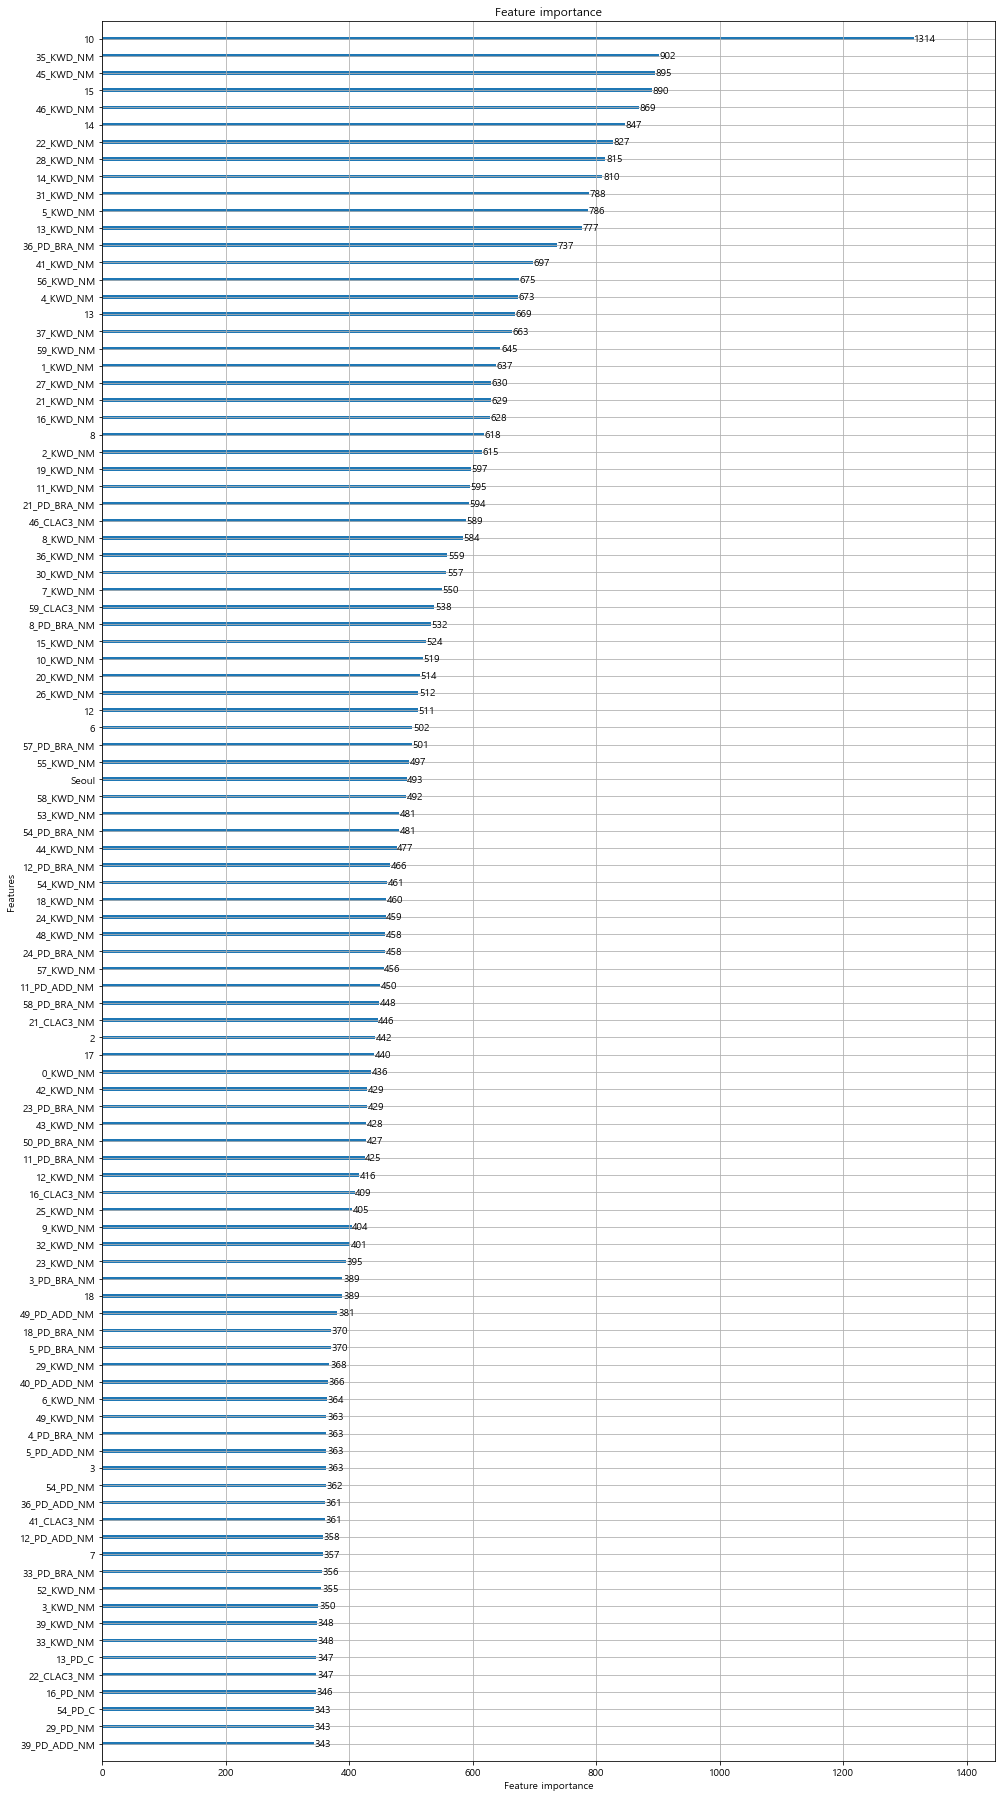

In [99]:
from lightgbm import plot_importance

plot_importance(lgbm, figsize=(16, 32), max_num_features=100)
plt.show()

In [100]:
importance_df = pd.DataFrame(X_train.columns)
importance_df['importance'] = lgbm.feature_importances_
importance_df.columns = ['feature_name','importance']
importance_df_sorted = importance_df.sort_values('importance', ascending = False)

In [101]:
importance_df_sorted.head(20)

,feature_name,importance
10,10,1314
253,35_KWD_NM,902
263,45_KWD_NM,895
15,15,890
264,46_KWD_NM,869
14,14,847
240,22_KWD_NM,827
246,28_KWD_NM,815
232,14_KWD_NM,810
249,31_KWD_NM,788


## <font color='CC3D3D'> Hyperparameter Tuning

In [102]:
X_train = data_v
X_test = data_te_v

In [103]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [104]:
X_train = X_train.drop(columns = ['CLNT_ID'])
X_test = X_test.drop(columns = ['CLNT_ID'])

y_train = pd.read_csv('y_train.csv').LABEL
display(y_train)

0         F20
1         F30
2         F20
3         F30
4         F30
         ... 
149995    F30
149996    F30
149997    F30
149998    F30
149999    F30
Name: LABEL, Length: 150000, dtype: object

In [105]:
X_train.shape, X_test.shape, y_train.shape

((150000, 458), (113104, 458), (150000,))

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [107]:
from bayes_opt import BayesianOptimization

bayesian_params = {
    'n_estimators':(100, 2000),
    'max_depth':(8, 16),
    'num_leaves':(24, 64),
    'min_child_samples':(10, 200),
    'min_child_weight':(1, 50),
    'subsample':(0.5, 1),
    'colsample_bytree':(0.5, 1),
    'max_bin':(10, 500),
    'reg_lambda':(0.001, 10),
    'reg_alpha':(0.01, 50)
}

In [108]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


def lgb_nll_eval(n_estimators, max_depth, num_leaves, min_child_samples, min_child_weight, subsample, 
                colsample_bytree, max_bin, reg_lambda, reg_alpha):
    
    params = {
        "learning_rate":0.02,
        "n_estimators":int(round(n_estimators)), 
        'max_depth':int(round(max_depth)),
        'num_leaves':int(round(num_leaves)),
        'min_child_samples': int(round(min_child_samples)),
        'min_child_weight': int(round(min_child_weight)),
        'subsample':max(min(subsample, 1), 0),
        'colsample_bytree':max(min(colsample_bytree, 1), 0),
        'reg_lambda': max(reg_lambda,0),
        'reg_alpha': max(reg_alpha, 0)
    }
    
    lgbm = LGBMClassifier(**params)
    skf = StratifiedKFold(n_splits=5 , shuffle=True, random_state=42)
    score = cross_val_score(lgbm, X_train, y_train, scoring='neg_log_loss', cv=skf, n_jobs=-1)
    
    return np.mean(score)

In [109]:
lgbBO = BayesianOptimization(f=lgb_nll_eval, pbounds=bayesian_params, random_state=42)
lgbBO.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... |  max_bin  | max_depth | min_ch... | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  1        | -1.191    |  0.6873   |  475.9    |  13.86    |  123.7    |  8.645    |  396.4    |  26.32    |  43.31    |  6.012    |  0.854    |
|  2        | -1.183    |  0.5103   |  485.3    |  14.66    |  50.34    |  9.909    |  448.5    |  36.17    |  26.24    |  4.32     |  0.6456   |
|  3        | -1.176    |  0.8059   |  78.35    |  10.34    |  79.61    |  23.35    |  1.592e+0 |  31.99    |  25.72    |  5.925    |  0.5232   |
|  4        | -1.181    |  0.8038   |  93.56    |  8.52     |  190.3    |  48.32    |  1.636e+0 |  36.18    |  4.893    |  6.843    |  0.7201   |
|  5        | -1.175    |  0.561    |  252.6    |  8.275    |  182.8    |  13.68    |  1.359e+0 |  36.47    |  26.01    |  5

KeyboardInterrupt: 

In [ ]:
lgbBO.max

In [ ]:
max_params = lgbBO.max['params']

max_params['learning_rate'] = 0.02
max_params['max_bin'] = int(round(max_params['max_bin']))
max_params['max_depth'] = int(round(max_params['max_depth']))
max_params['n_estimators'] = int(round(max_params['n_estimators']))
max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['min_child_samples'] = int(round(max_params['min_child_samples']))

max_params['colsample_bytree'] = round(max_params['colsample_bytree'],3)
max_params['min_child_weight'] = round(max_params['min_child_weight'],3)
max_params['reg_alpha'] = round(max_params['reg_alpha'], 3)
max_params['reg_lambda'] = round(max_params['reg_lambda'], 3)
max_params['subsample'] = round(max_params['subsample'], 3)

max_params

# <font color='CC3D3D'> Predict

In [ ]:
X_train = data_v
X_test = data_te_v

In [ ]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [ ]:
X_train = X_train.drop(columns = ['CLNT_ID'])
X_test = X_test.drop(columns = ['CLNT_ID'])

y_train = pd.read_csv('y_train.csv').LABEL
display(y_train)

In [ ]:
X_train.shape, X_test.shape, y_train.shape

In [119]:
from sklearn.model_selection import KFold

models = []

folds = KFold(n_splits=10)
for train_idx, val_idx in folds.split(X_train):
    
    train_x = X_train.iloc[train_idx, :]
    train_y = y_train[train_idx]
    val_x = X_train.iloc[val_idx, :]
    val_y = y_train[val_idx]
    
    model = LGBMClassifier(
                    random_state = 42, 
                    learning_rate = 0.02,
                    n_estimators = 771,
                    max_depth = 12, 
                    num_leaves = 25,
                    min_child_samples = 55,
                    min_child_weight = 1.933,
                    subsample = 0.527,
                    colsample_bytree = 0.502,
                    reg_lambda = 9.935,
                    reg_alpha = 0.812,
                    objective = 'multiclass',
                    num_class = 6,
                    metric = 'multi_logloss')
    
    model.fit(train_x, train_y,
              eval_set=[(val_x, val_y)],
              eval_metric=["multi_logloss"],
              early_stopping_rounds=300,
              verbose=500)
    
    models.append(model)

Training until validation scores don't improve for 300 rounds
[500]	valid_0's multi_logloss: 1.17342
Did not meet early stopping. Best iteration is:
[771]	valid_0's multi_logloss: 1.16877
Training until validation scores don't improve for 300 rounds
[500]	valid_0's multi_logloss: 1.18195
Did not meet early stopping. Best iteration is:
[770]	valid_0's multi_logloss: 1.17679
Training until validation scores don't improve for 300 rounds
[500]	valid_0's multi_logloss: 1.1717
Did not meet early stopping. Best iteration is:
[770]	valid_0's multi_logloss: 1.16641
Training until validation scores don't improve for 300 rounds
[500]	valid_0's multi_logloss: 1.17738
Did not meet early stopping. Best iteration is:
[770]	valid_0's multi_logloss: 1.17221
Training until validation scores don't improve for 300 rounds
[500]	valid_0's multi_logloss: 1.17556
Did not meet early stopping. Best iteration is:
[770]	valid_0's multi_logloss: 1.17064
Training until validation scores don't improve for 300 rounds

In [120]:
#테스트 데이터 예측
result = []
for i in models:
    result.append(i.predict_proba(X_test))
predict = np.mean(result, axis = 0)
pred = pd.DataFrame(predict)

In [121]:
# 결과값 정제 및 내보내기
result = pd.concat([cust_te, pred], axis=1)
result.columns = ['CLNT_ID','F20','F30','F40','M20','M30','M40']
result.to_csv('lgbmtune.csv',index=False)

In [122]:
result

,CLNT_ID,F20,F30,F40,M20,M30,M40
0,2,0.021675,0.749361,0.140601,0.000948,0.039354,0.048060
1,3,0.487519,0.272672,0.148134,0.057913,0.018576,0.015185
2,4,0.082341,0.275532,0.596960,0.003916,0.013956,0.027295
3,5,0.145694,0.519427,0.289045,0.007957,0.011871,0.026007
4,7,0.008777,0.205411,0.763144,0.000446,0.003447,0.018776
...,...,...,...,...,...,...,...
113099,263097,0.094797,0.327006,0.507464,0.006937,0.020472,0.043323
113100,263098,0.036663,0.333915,0.259843,0.016908,0.169574,0.183098
113101,263099,0.216556,0.418240,0.149631,0.055215,0.108914,0.051444
113102,263100,0.113841,0.215927,0.605536,0.007865,0.014481,0.042350


## Feature importance

Learning rate set to 0.102165
0:	learn: 1.6977733	total: 659ms	remaining: 10m 58s
1:	learn: 1.6278920	total: 1.28s	remaining: 10m 38s
2:	learn: 1.5725935	total: 1.93s	remaining: 10m 40s
3:	learn: 1.5281011	total: 2.47s	remaining: 10m 14s
4:	learn: 1.4907487	total: 2.99s	remaining: 9m 55s
5:	learn: 1.4592846	total: 3.6s	remaining: 9m 56s
6:	learn: 1.4323811	total: 4.21s	remaining: 9m 57s
7:	learn: 1.4093492	total: 4.79s	remaining: 9m 54s
8:	learn: 1.3900755	total: 5.34s	remaining: 9m 47s
9:	learn: 1.3734273	total: 5.96s	remaining: 9m 50s
10:	learn: 1.3588839	total: 6.51s	remaining: 9m 45s
11:	learn: 1.3467810	total: 7.15s	remaining: 9m 48s
12:	learn: 1.3353848	total: 7.78s	remaining: 9m 50s
13:	learn: 1.3257197	total: 8.43s	remaining: 9m 53s
14:	learn: 1.3163737	total: 9.03s	remaining: 9m 52s
15:	learn: 1.3090817	total: 9.62s	remaining: 9m 51s
16:	learn: 1.3016514	total: 10.2s	remaining: 9m 50s
17:	learn: 1.2948981	total: 10.8s	remaining: 9m 47s
18:	learn: 1.2891496	total: 11.3s	remaini

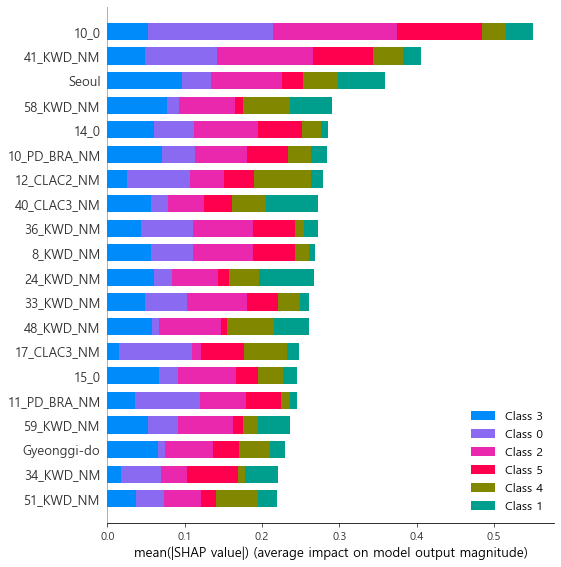

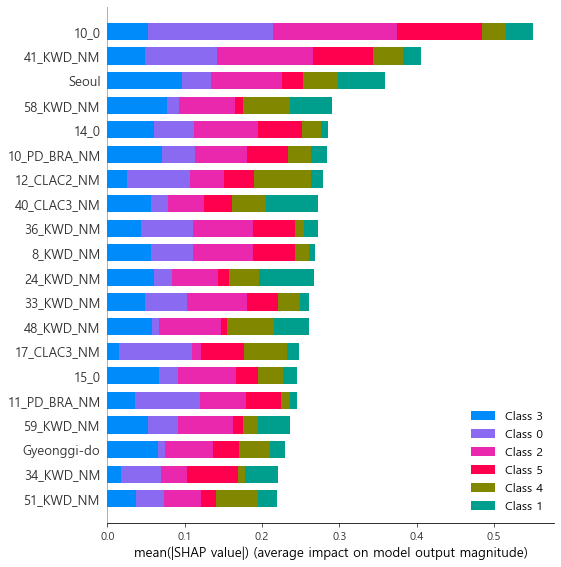

In [110]:
#SHAP
import shap

X_importance = X_test

model = CatBoostClassifier(random_state=0).fit(X_train, y_train)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_importance)


#model = LGBMRegressor(random_state=0).fit(X_train_scaled, y)
#explainer = shap.TreeExplainer(model)
#shap_values = explainer.shap_values(X_importance)

# Plot summary_plot
shap.summary_plot(shap_values, X_importance)
# Plot summary_plot as barplot
shap.summary_plot(shap_values, X_importance, plot_type='bar')

#shap_sum = np.abs(shap_values).mean(axis=0)
#importance_df = pd.DataFrame([X_importance.columns.tolist(), shap_sum.tolist()]).T
#importance_df.columns = ['column_name', 'shap_importance']
#importance_df = importance_df.sort_values('shap_importance', ascending=False)
#importance_df